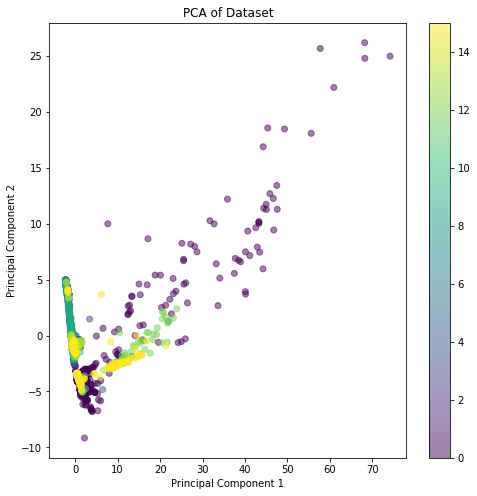

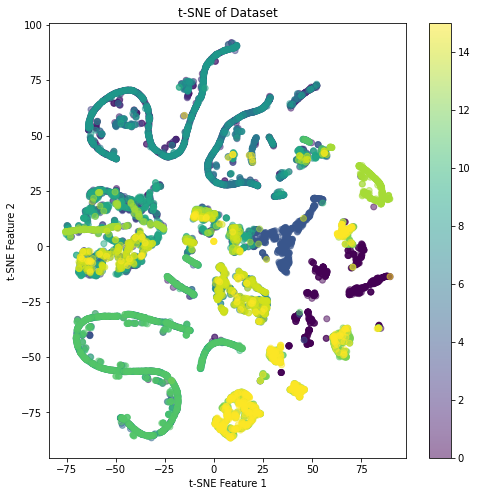

In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# 加载数据
data = pd.read_csv('./combined_data.csv')

# 删除不需要的列，例如时间戳或IP地址（假设你的数据集中有这些列）
data.drop([' Timestamp'], axis=1, inplace=True)

# 类型转换，将分类标签编码
label_encoder = LabelEncoder()
data[' Label'] = label_encoder.fit_transform(data[' Label'])

# 检查并处理无穷大和非常大的数值
data.replace([np.inf, -np.inf], np.nan, inplace=True)  # 将inf替换为NaN
data.fillna(data.median(), inplace=True)  # 使用中位数填充NaN，确保之前中位数计算不包括inf

# 特征标准化
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(' Label', axis=1))  # 确保标签列不参与标准化
y = data[' Label']
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 可视化 PCA
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# 可视化 t-SNE
plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('t-SNE of Dataset')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar()
plt.show()
